# WTSX on Australian temperature prediction

## Prepping Data

In [1]:
import random

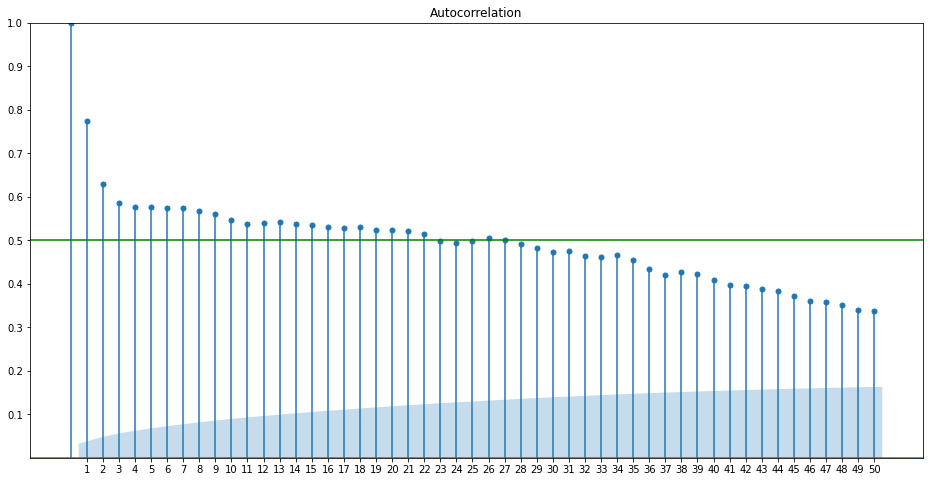

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy.stats import rankdata

df = pd.read_csv('australia_temp_data.csv')
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df['Temp'], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [3]:
df_train = df['Temp'].iloc[:-5]
df_test = df['Temp'].iloc[-5:]

In [4]:
df_train

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3640    13.2
3641    13.9
3642    10.0
3643    12.9
3644    14.6
Name: Temp, Length: 3645, dtype: float64

## Basic autoregressive model

In [5]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_train, lags=22, trend='c').fit()

In [6]:
forecasts = model.forecast(5).tolist()
test_values = df_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

14.454713753476378 14.0 0.4547137534763781
13.795239148498208 13.6 0.19523914849820834
13.43924997836593 13.5 -0.060750021634069284
13.323261111336544 15.7 -2.3767388886634553
13.111045598879652 13.0 0.11104559887965237


In [7]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts))

1.1819584715502316


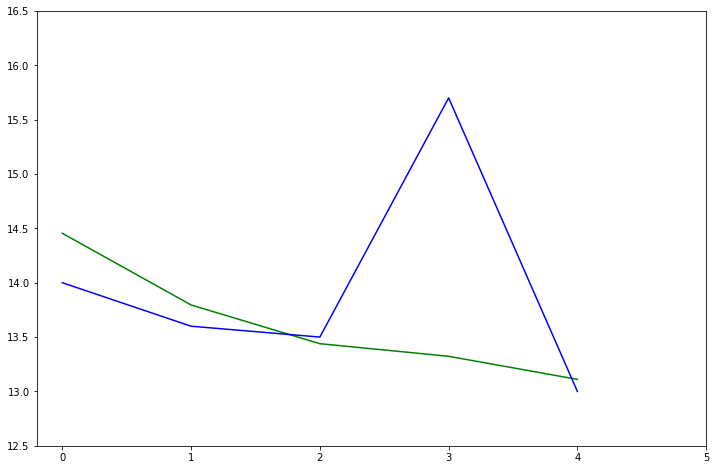

In [8]:
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

<BarContainer object of 22 artists>

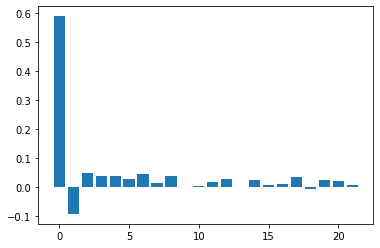

In [9]:
plt.bar(range(len(model.params)-1), model.params[1:])

In [10]:
real_rank = len(model.params[1:]) - rankdata(model.params[1:], method='ordinal')

In [11]:
import wts
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
class Test_model:
    def __init__(self, params):
        self.const = params[0]
        self.weights = np.array(params[1:]).reshape((22,1))
    def predict(self, x):
        print(np.sum(np.multiply(x, self.weights)))
        return self.const + np.sum(np.multiply(x, self.weights))

In [13]:
test_model = Test_model(model.params)

In [14]:
test_model.weights

array([[ 5.90210213e-01],
       [-9.15592900e-02],
       [ 4.83465453e-02],
       [ 4.06269560e-02],
       [ 4.05021495e-02],
       [ 2.74508326e-02],
       [ 4.60313958e-02],
       [ 1.49597852e-02],
       [ 3.90781365e-02],
       [ 1.25038424e-04],
       [ 6.17863951e-03],
       [ 2.00002163e-02],
       [ 2.83504633e-02],
       [ 3.14466733e-04],
       [ 2.47974513e-02],
       [ 8.68720732e-03],
       [ 1.25685650e-02],
       [ 3.69479122e-02],
       [-6.49132118e-03],
       [ 2.69996992e-02],
       [ 2.35243943e-02],
       [ 7.90026861e-03]])

In [15]:
df_train[-23:].shape

(23,)

In [16]:
df_test

3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [17]:
test_forecast = test_model.predict(np.array(df_train[-22:]).reshape((22,1)))

16.361450575968373


In [18]:
dummy_series_length = 22
dummy_series_dim = 1
dummy_series = np.ones((dummy_series_length, dummy_series_dim))
dummy_series_tens = np.ones((dummy_series_length, dummy_series_dim))*10
dummy_series_rand = np.ones((dummy_series_length, dummy_series_dim))
test_start = 50
test2_start = 500
dummy_series_test = np.array(df_train[test_start: test_start+dummy_series_length]).reshape(dummy_series_length, dummy_series_dim)
dummy_series_test2= np.array(df_train[test2_start: test2_start+dummy_series_length]).reshape(dummy_series_length, dummy_series_dim)

In [19]:
df_train

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3640    13.2
3641    13.9
3642    10.0
3643    12.9
3644    14.6
Name: Temp, Length: 3645, dtype: float64

## Explanation

In [20]:
explainer = wts.WindowX(dummy_series_test2, test_model, time_windows=[1, 2, 3, 4, 5, 6, 7, 8, 9], time_shifts=[1], norm=True, reg="exp")

REF [8.31363636]
INPUT [[15.7]
 [16.6]
 [16.5]
 [14.4]
 [14.4]
 [18.5]
 [16.9]
 [17.5]
 [21.2]
 [17.8]
 [18.6]
 [17. ]
 [16. ]
 [13.3]
 [14.3]
 [11.4]
 [16.3]
 [16.1]
 [11.8]
 [12.2]
 [14.7]
 [11.8]]
7.860956575358375
PRED REF 8.461490158515778
14.948556066542446
PRED INPUT 15.549089649699848
14.948556066542446
10.589048811487263
15.707249637500743
14.552773666498096
14.701285639027843
14.702045256794989
14.668931903338143
14.553313763392245
14.811130039909274
14.444980989277942
14.947369906587502
14.885000333721143
14.7748269153736
14.730644096443209
14.946988021062086
14.800109505783558
14.921744185771688
14.848178936400876
14.660866186900734
14.97118717267272
14.843625417370767
14.7983207301031
14.92101285733221
11.347742382445562
15.311467237456393
14.305503238983492
14.454774829280385
14.422421093590687
14.273689600187941
14.415887736759073
14.30755496264477
14.443794829322998
14.883814173766199
14.711271182552297
14.556914945274364
14.729076050962849
14.798541460303198
14.7732976

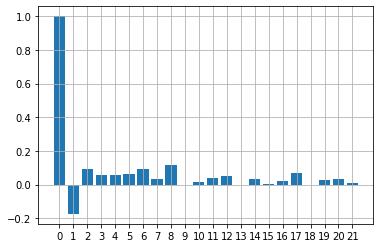

In [21]:
effect = explainer.explain(dummy_series_test)

### Real model parameters

<BarContainer object of 22 artists>

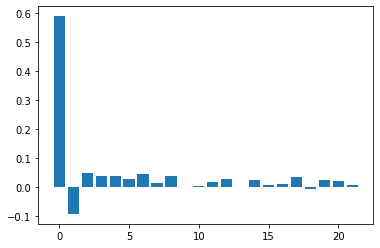

In [22]:
plt.bar(range(len(model.params)-1), model.params[1:])

### NDCG

In [23]:
from sklearn.metrics import ndcg_score

In [24]:
pred_rank = len(effect[0]) - rankdata(effect, method='ordinal')

In [25]:
print(real_rank)

[ 0 21  1  3  4  8  2 13  5 19 17 12  7 18 10 15 14  6 20  9 11 16]


In [26]:
print(pred_rank)

[ 0 21  2  6  7  5  3 12  1 19 15  9  8 18 11 17 14  4 20 13 10 16]


In [27]:
ndcg_score(np.asarray([real_rank]), np.asarray([pred_rank]))

0.9963392686016002

## Dummy model rule based

In [28]:
class Dummy_model5_feats:
    """
            dummy predictor with the t to k_th time steps' n_th to m_th variables influencing only 
    """
    def __init__(self, t, k, n, m, r1, r2):
            self.t = t
            self.n = n
            self.k = k
            self.m = m
            self.r1 = r1
            self.r2 = r2

    def predict(self, input):
        if np.sum(input[self.t, self.n:self.m]) > np.sum(input[self.k, self.n:self.m]):
            return np.sum(input[self.r1, self.n:self.m])
        else:
            return np.sum(input[self.r2, self.n:self.m])

In [37]:
dummy_series_length = 22
dummy_series_dim = 22
dummy_series = np.ones((dummy_series_length, dummy_series_dim))
dummy_series_tens = np.ones((dummy_series_length, dummy_series_dim))*10
dummy_series_inc = np.array([[i+j*dummy_series_length for i in range(dummy_series_length)] for j in range(dummy_series_length)])
dummy_series_inc

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21],
       [ 22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
         35,  36,  37,  38,  39,  40,  41,  42,  43],
       [ 44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87],
       [ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131],
       [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153],
       [154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 

In [38]:
dummy_model = Dummy_model5_feats(0, 1, 10, 20, 2, 3)

In [39]:
explainer = wts.WindowX(dummy_series, dummy_model, time_windows=range(1,23), time_shifts=range(1,2), norm=True, reg="softmax")

REF [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
INPUT [[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21]
 [ 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
   40  41  42  43]
 [ 44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
   62  63  64  65]
 [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
   84  85  86  87]
 [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
  106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
  128 129 130 131]
 [132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
  150 151 152 153]
 [154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
  172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
  194 195 196 197]
 [198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
  216 217 2

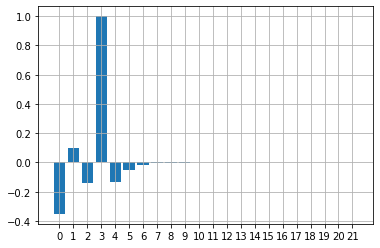

array([-3.52092853e-01,  9.88498705e-02, -1.41124995e-01,  1.00000000e+00,
       -1.36800226e-01, -5.03259899e-02, -1.85138964e-02, -6.81088119e-03,
       -2.50558251e-03, -9.21751633e-04, -3.39092816e-04, -1.24744616e-04,
       -4.58903203e-05, -1.68814459e-05, -6.20967744e-06, -2.28375321e-06,
       -8.39486400e-07, -3.08170333e-07, -1.12710075e-07, -4.08042644e-08,
       -1.43515951e-08, -4.62020183e-09])

In [42]:
explainer.explain(dummy_series_inc)